In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
print(heart.info())
display(heart.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
print(heart.isna().sum())
print(heart.duplicated().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
0


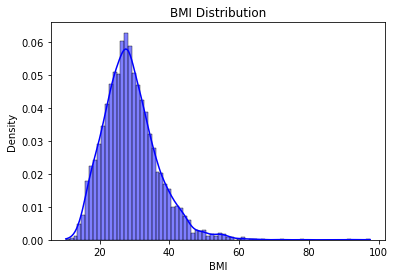

In [6]:
fig, ax = plt.subplots()
sns.histplot(data = heart, x = 'bmi', color = 'blue',stat = 'density', kde = True, ax = ax)
ax.set_title('BMI Distribution')
ax.set_xlabel('BMI')
plt.show()

In [7]:
quantile = heart['bmi'].quantile([0.25,0.5,0.75])
Q1 = quantile[0.25]
Q3 = quantile[0.75]
IQR = np.round(Q3 - Q1,1)
print(Q1)
print(Q3)
print(IQR)

23.5
33.1
9.6


In [8]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
minusoutlier = heart[(heart['bmi'] >= lower) & (heart['bmi'] <= upper )]

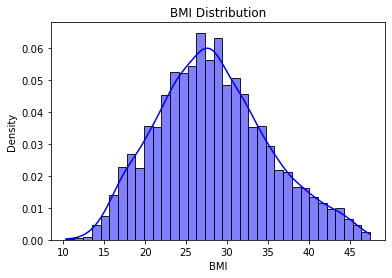

In [9]:
fig, ax = plt.subplots()
sns.histplot(data = minusoutlier, x = 'bmi', color = 'blue',stat = 'density', kde = True, ax = ax)
ax.set_title('BMI Distribution')
ax.set_xlabel('BMI')
plt.show()

In [10]:
mean = minusoutlier['bmi'].mean()
heart['bmi'] = heart['bmi'].fillna(mean)
print(heart.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Exploratory Data Analysis

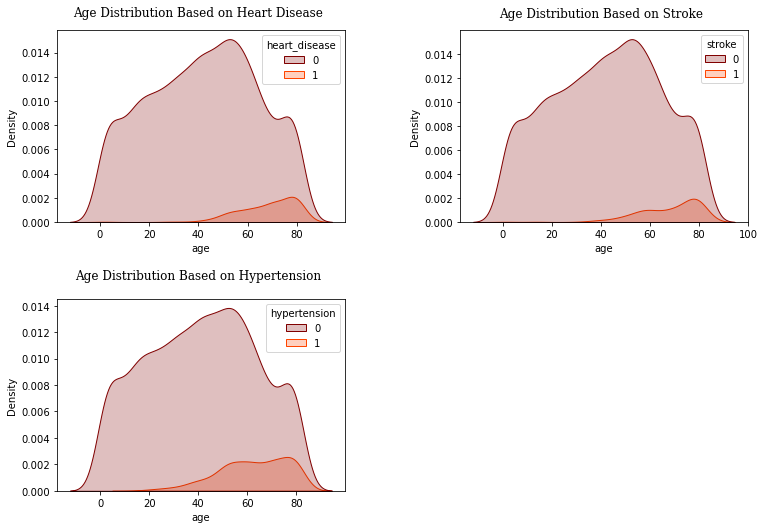

In [11]:
fig, ax = plt.subplots(2,2, figsize = (12,8))
sns.kdeplot(data = heart, x = 'age', hue = 'heart_disease',palette= ["maroon","orangered"],fill = True,
             ax = ax[0,0])
ax[0,0].text(40,0.017,'Age Distribution Based on Heart Disease', fontsize = 12,fontfamily = 'serif', color = 'black',
          horizontalalignment = 'center')

sns.kdeplot(data = heart, x = 'age', hue = 'stroke',palette = ["maroon","orangered"],fill = True,
             ax = ax[0,1])
ax[0,1].text(40,0.017,'Age Distribution Based on Stroke', fontsize = 12,fontfamily = 'serif', color = 'black',
          horizontalalignment = 'center')

sns.kdeplot(data = heart, x = 'age', hue = 'hypertension',palette= ["maroon","orangered"],fill = True,
             ax = ax[1,0])

ax[1,0].text(40,0.016,'Age Distribution Based on Hypertension', fontsize = 12,fontfamily = 'serif', color = 'black',
          horizontalalignment = 'center')

ax[1,1].spines["bottom"].set_visible(False)
ax[1,1].spines["left"].set_visible(False)
ax[1,1].spines["top"].set_visible(False)
ax[1,1].spines["right"].set_visible(False)
ax[1,1].tick_params(left=False, bottom=False)
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

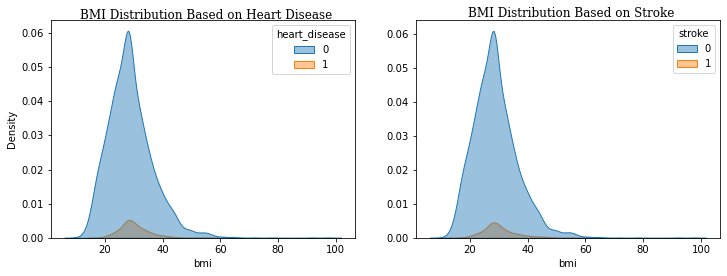

In [12]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.kdeplot(data = heart, x = 'bmi', hue = 'heart_disease', ax = ax[0],alpha = 0.45, fill = True)
ax[0].text(55,0.064,'BMI Distribution Based on Heart Disease', fontsize = 12,fontfamily = 'serif', color = 'black',
          horizontalalignment = 'center')
sns.kdeplot(data = heart, x = 'bmi', hue = 'stroke',ax = ax[1],alpha = 0.45, fill = True)
ax[1].text(55,0.065,'BMI Distribution Based on Stroke', fontsize = 12,fontfamily = 'serif', color = 'black',
          horizontalalignment = 'center')
ax[1].set_ylabel('')

plt.show()

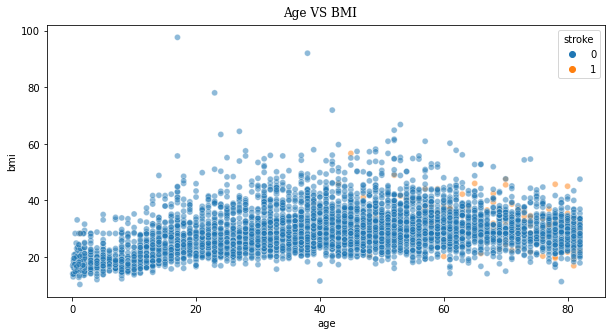

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = heart, x = 'age',y ='bmi',hue = 'stroke', ax= ax, alpha = 0.5)
ax.text(40,105,'Age VS BMI', fontsize = 12,fontfamily = 'serif', color = 'black',
          horizontalalignment = 'center')
plt.show()

In [14]:
stroke_ = heart[heart['stroke'] == 1]

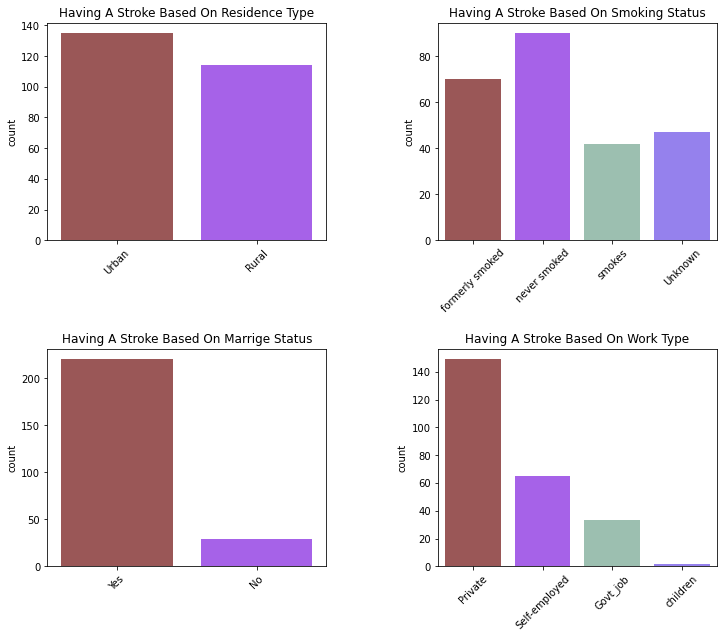

In [15]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig,ax = plt.subplots(2,2, figsize = (12,10))

sns.countplot(data = stroke_, x = 'Residence_type',palette = color_palette,ax = ax[0,0], alpha = 0.7)
ax[0,0].set_title('Having A Stroke Based On Residence Type')
ax[0,0].tick_params(axis = 'x',rotation = 45)
ax[0,0].set_xlabel('')

sns.countplot(data = stroke_, x = 'smoking_status',palette = color_palette,ax = ax[0,1], alpha = 0.7)
ax[0,1].set_title('Having A Stroke Based On Smoking Status')
ax[0,1].tick_params(axis = 'x',rotation = 45)
ax[0,1].set_xlabel('')

sns.countplot(data = stroke_, x = 'ever_married',palette = color_palette,ax = ax[1,0], alpha = 0.7)
ax[1,0].set_title('Having A Stroke Based On Marrige Status')
ax[1,0].tick_params(axis = 'x',rotation = 45)
ax[1,0].set_xlabel('')

sns.countplot(data = stroke_, x = 'work_type',palette = color_palette,ax = ax[1,1], alpha = 0.7)
ax[1,1].set_title('Having A Stroke Based On Work Type')
ax[1,1].tick_params(axis = 'x',rotation = 45)
ax[1,1].set_xlabel('')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.5)
plt.show()

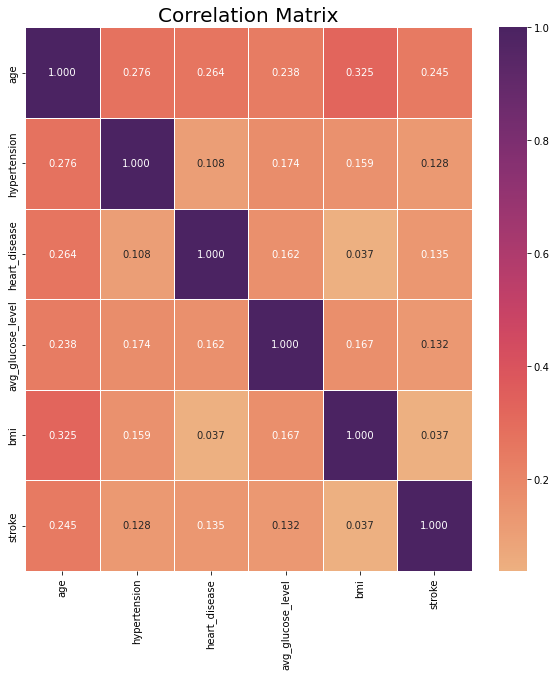

In [16]:
corr = heart.drop('id',axis = 1).corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, linewidths = 0.5,fmt = '.3f',cmap='flare',annot = True, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,confusion_matrix

In [18]:
X = heart.drop(columns = ['id','stroke'])
y = heart['stroke']
print(X.shape)
print(y.shape)

(5110, 10)
(5110,)


In [19]:
transformed = pd.get_dummies(X, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
print(transformed.info())
display(transformed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Female                   5110 non-null   uint8  
 6   gender_Male                     5110 non-null   uint8  
 7   gender_Other                    5110 non-null   uint8  
 8   ever_married_No                 5110 non-null   uint8  
 9   ever_married_Yes                5110 non-null   uint8  
 10  work_type_Govt_job              5110 non-null   uint8  
 11  work_type_Never_worked          5110 non-null   uint8  
 12  work_type_Private               51

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.313586,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [20]:
SS = StandardScaler()
standardized_data = SS.fit_transform(transformed)
X = pd.DataFrame(standardized_data)
X.columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']
display(X.head())

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,1.004089,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313
1,0.786070,-0.328602,-0.238947,2.121559,-0.072336,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313
2,1.626390,-0.328602,4.185032,-0.005028,0.471489,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313
3,0.255342,-0.328602,-0.238947,1.437358,0.718303,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204
4,1.582163,3.043196,-0.238947,1.501184,-0.632681,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313


In [21]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42,stratify = y)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3832, 21)
(3832,)
(1278, 21)
(1278,)


In [36]:
#Classification using Support Vector Machine
svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
#print model assesments.
print(f'accuracy score : {acc_score}')
print('Classification report :')
print(report)

accuracy score : 0.9514866979655712
Classification report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#RandomSeacrh for SVM
C = [0.001,0.01,0.1,1,10,100]
gamma = [0.001,0.01,0.1,1,10,100]
params = {'C' : C, 'gamma' : gamma}
svc = SVC(kernel = 'rbf')
svc_cv = RandomizedSearchCV(svc,params,cv = 5)
svc_cv.fit(X_train,y_train)
print(f'Best Parameter : {svc_cv.best_params_}')
print(f'Best Score : {svc_cv.best_score_}')

Best Parameter : {'gamma': 0.1, 'C': 0.001}
Best Score : 0.9512008060974738


In [42]:
#Classsification using LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

#Classification Evaluation.
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
AUC_score = roc_auc_score(y_test,y_pred_prob)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

accuracy score : 0.9514866979655712
Classification report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       1.00      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.98      0.51      0.50      1278
weighted avg       0.95      0.95      0.93      1278

AUC score : 0.8416542869269948
-------------------------
ROC Curve :


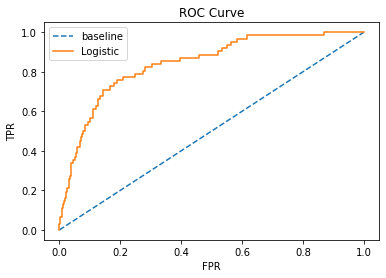

In [43]:
#print & plot
print(f'accuracy score : {acc_score}')
print('Classification report :')
print(report)
print(f'AUC score : {AUC_score}')
print('-'*25)
print('ROC Curve :')
plt.plot([0,1],[0,1], label = 'baseline', linestyle = '--')
plt.plot(fpr,tpr, label = 'Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [45]:
#Classsification using LogisticRegression
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred_prob = RF.predict_proba(X_test)[:,1]

#Classification Evaluation.
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
AUC_score = roc_auc_score(y_test,y_pred_prob)
fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob)

accuracy score : 0.9514866979655712
Classification report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.25      0.03      0.06        62

    accuracy                           0.95      1278
   macro avg       0.60      0.51      0.52      1278
weighted avg       0.92      0.95      0.93      1278

AUC score : 0.7832860250424448
-------------------------
ROC Curve :


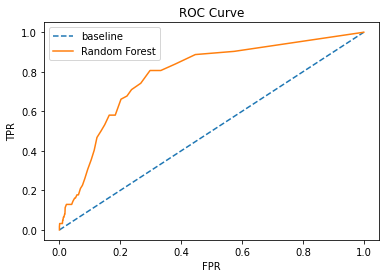

In [46]:
#print & plot
print(f'accuracy score : {acc_score}')
print('Classification report :')
print(report)
print(f'AUC score : {AUC_score}')
print('-'*25)
print('ROC Curve :')
plt.plot([0,1],[0,1], label = 'baseline', linestyle = '--')
plt.plot(fpr1,tpr1, label = 'Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

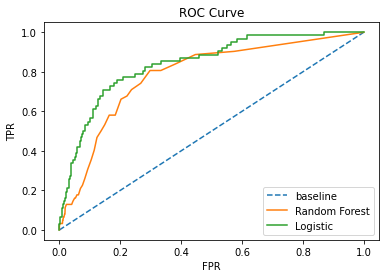

In [47]:
plt.plot([0,1],[0,1], label = 'baseline', linestyle = '--')
plt.plot(fpr1,tpr1, label = 'Random Forest')
plt.plot(fpr,tpr, label = 'Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()